In [259]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score,  mean_squared_error, f1_score, roc_auc_score

from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()

##### Data loading and Preparation

In [395]:
train_df = pd.read_csv("Train.csv")


In [400]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [302]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,Female,20,Black African,Dwelling/house or brick/concrete block structu...,Formal,North West,NW - Non Metro,66710095,South Africa,...,Single and have never been married/never lived...,Xitsonga,Setswana,Grade 11/Standard 9/Form 4,No,No,No,No,Not applicable,0
1,ID_00061163,Female,42,Black African,Dwelling/house or brick/concrete block structu...,Formal,Limpopo,LP - Non Metro,98510279,South Africa,...,Living together like husband and wife,Sepedi,Sepedi,Grade 12/Standard 10/Form 5/Matric (No Exemption),Yes,No,No,Not applicable,Permanent,0
2,ID_00071403,Female,86,Black African,Dwelling/house or brick/concrete block structu...,Formal,Eastern Cape,EC - Non Metro,29210321,South Africa,...,Widowed,IsiXhosa,IsiXhosa,Unspecified,No,No,No,No,Not applicable,0
3,ID_00077803,Female,20,Black African,Town house (semi-detached house in complex),Formal,KwaZulu-Natal,KZN - eThekwini,59913860,South Africa,...,Single and have never been married/never lived...,IsiZulu,IsiZulu,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0
4,ID_00086763,Female,26,Black African,Town house (semi-detached house in complex),Formal,Gauteng,GP - City of Johannesburg,79813828,South Africa,...,Single and have never been married/never lived...,Setswana,English,Grade 12/Standard 10/Form 5/Matric (No Exemption),No,No,No,No,Not applicable,0


In [303]:
train_df.columns

Index(['ID', 'gender', 'age', 'race', 'dwelling', 'dwelling_type',
       'province_code', 'metro_code', 'psu', 'nationality', 'RTH',
       'marital_st', 'Lang_inside', 'Lang_outside', 'Education', 'lw_work',
       'lw_business', 'help_on_household', 'job_or_business', 'nature_of_work',
       'target'],
      dtype='object')

#### Data Visualisation

/home/aimssn/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

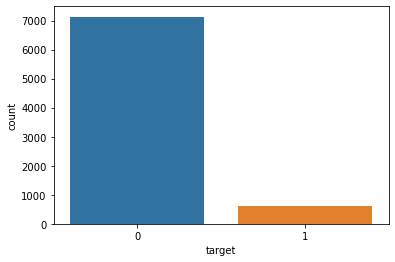

In [304]:
sns.countplot(train_df["target"])

- Try to create more visualisation from the other columns, what is the level of education of individual in the dataset.
- What about coorelation of other columns to the target.

##### Handling Categorical columns
- There are various way of encoding categorical columns. In the case below we're using label encoding 
<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html>.
- Find out other ways of encoding categorical columns, like one hot encoding - which one works better on this case.

In [305]:
train_df['gender'] = label.fit_transform(train_df['gender'])
train_df['race'] = label.fit_transform(train_df['race'])
train_df['dwelling'] = label.fit_transform(train_df['dwelling'])
train_df['dwelling_type'] = label.fit_transform(train_df['dwelling_type'])
train_df['province_code'] = label.fit_transform(train_df['province_code'])
train_df['metro_code'] = label.fit_transform(train_df['metro_code'])
train_df['nationality'] = label.fit_transform(train_df['nationality'])
train_df['RTH'] = label.fit_transform(train_df['RTH'])
train_df['marital_st'] = label.fit_transform(train_df['marital_st'])
train_df['Lang_inside'] = label.fit_transform(train_df['Lang_inside'])
train_df['Lang_outside'] = label.fit_transform(train_df['Lang_outside'])
train_df['Education'] = label.fit_transform(train_df['Education'])
train_df['lw_work'] = label.fit_transform(train_df['lw_work'])
train_df['lw_business'] = label.fit_transform(train_df['lw_business'])
train_df['help_on_household'] = label.fit_transform(train_df['help_on_household'])
train_df['job_or_business'] = label.fit_transform(train_df['job_or_business'])
train_df['nature_of_work'] = label.fit_transform(train_df['nature_of_work'])



In [306]:
train_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,...,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,ID_00008683,0,20,0,2,0,6,14,66710095,1,...,4,14,9,9,1,1,1,1,3,0
1,ID_00061163,0,42,0,2,0,4,11,98510279,1,...,1,7,7,11,3,1,1,2,4,0
2,ID_00071403,0,86,0,2,0,0,2,29210321,1,...,7,3,3,32,1,1,1,1,3,0
3,ID_00077803,0,20,0,10,0,3,10,59913860,1,...,4,4,4,11,1,1,1,1,3,0
4,ID_00086763,0,26,0,10,0,2,5,79813828,1,...,4,9,1,11,1,1,1,1,3,0


In [393]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,7736.0,0.000000e+00,0.000000e+00,0.0,0.00,0.0,0.0,0.0
age,7736.0,4.219325e+01,1.726925e+01,16.0,29.00,39.0,54.0,102.0
race,7736.0,3.532834e-01,8.474820e-01,0.0,0.00,0.0,0.0,3.0
dwelling,7736.0,3.665460e+00,2.950096e+00,0.0,2.00,2.0,5.0,12.0
dwelling_type,7736.0,1.296536e-01,3.752108e-01,0.0,0.00,0.0,0.0,2.0
province_code,7736.0,3.383014e+00,2.407329e+00,0.0,2.00,3.0,5.0,8.0
metro_code,7736.0,8.683299e+00,4.351137e+00,0.0,5.00,9.0,12.0,16.0
psu,7736.0,6.078730e+07,2.548540e+07,16010072.0,36810035.75,59914425.0,79910391.0,98710543.0
nationality,7736.0,9.705274e-01,2.226015e-01,0.0,1.00,1.0,1.0,2.0
RTH,7736.0,4.765770e+00,1.726166e+00,0.0,4.00,4.0,5.0,9.0


In [394]:
import seaborn as sns
correlation = train_df.corr()
correlation.style.background_gradient(cmap='coolwarm',axis=None)

,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
gender,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
age,nan,1.000000,0.169126,-0.041386,-0.088844,-0.014923,-0.019200,-0.046816,0.072477,-0.280621,0.277878,-0.077284,-0.035950,0.302945,-0.103363,0.024059,0.001345,-0.089940,-0.010557,-0.085340
race,nan,0.169126,1.000000,-0.041870,-0.095277,0.176812,0.122342,-0.182268,0.052459,0.013004,-0.101579,-0.510924,-0.472368,-0.129343,0.075854,0.037186,0.003010,0.084165,0.050165,0.014921
dwelling,nan,-0.041386,-0.041870,1.000000,0.338539,-0.108947,-0.124059,-0.184963,-0.028994,-0.030317,-0.010186,-0.128498,-0.136232,0.058157,0.011544,-0.007219,0.003408,0.004020,-0.020761,0.020139
dwelling_type,nan,-0.088844,-0.095277,0.338539,1.000000,0.012858,0.004486,-0.009990,-0.033185,0.001184,-0.052354,0.025377,0.022890,0.035933,0.002974,-0.002785,-0.006934,0.017025,-0.015069,-0.000565
province_code,nan,-0.014923,0.176812,-0.108947,0.012858,1.000000,0.958692,-0.078909,-0.027424,0.022183,-0.047728,-0.034530,-0.045518,-0.007963,0.046566,-0.014135,-0.007864,0.020374,-0.026899,-0.016545
metro_code,nan,-0.019200,0.122342,-0.124059,0.004486,0.958692,1.000000,0.099877,-0.024321,0.010399,-0.031166,0.053315,0.052883,0.003000,0.024391,-0.007812,-0.004567,0.003301,-0.021399,-0.036339
psu,nan,-0.046816,-0.182268,-0.184963,-0.009990,-0.078909,0.099877,1.000000,-0.053644,-0.013419,-0.004446,0.530815,0.509708,0.025316,-0.035202,0.040890,0.011694,-0.000569,0.049334,-0.046302
nationality,nan,0.072477,0.052459,-0.028994,-0.033185,-0.027424,-0.024321,-0.053644,1.000000,0.016350,0.091017,-0.073431,-0.016683,-0.028442,-0.014033,-0.078936,0.003363,-0.052868,-0.009018,-0.006855
RTH,nan,-0.280621,0.013004,-0.030317,0.001184,0.022183,0.010399,-0.013419,0.016350,1.000000,-0.105791,-0.024535,-0.024259,-0.088738,-0.039315,-0.049168,0.002745,-0.034591,0.002168,0.024186


In [308]:
train_df.RTH.unique()

array([8, 7, 1, 4, 5, 0, 2, 6, 3, 9])

In [401]:
#train_df.psu.max()

In [310]:
# drop some columns
train = train_df.drop(columns=['ID','gender','target'], axis=1)

In [311]:
#normalization
train_scaled = (train-train.mean(axis=0))/ train.std()
train_scaled

,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,-1.285131,-0.416862,-0.564544,-0.345549,1.087091,1.221911,0.232400,0.132401,1.873650,0.281561,2.452571,1.257703,-0.551974,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616
1,-0.011191,-0.416862,-0.564544,-0.345549,0.256295,0.532436,1.480180,0.132401,1.294331,-1.319242,0.541365,0.683025,-0.277097,1.379336,-0.253742,-0.064445,0.973317,0.541339
2,2.536691,-0.416862,-0.564544,-0.345549,-1.405298,-1.535989,-1.239022,0.132401,-2.181581,1.882365,-0.550753,-0.466332,2.609108,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616
3,-1.285131,-0.416862,2.147232,-0.345549,-0.159104,0.302611,-0.034272,0.132401,1.873650,0.281561,-0.277723,-0.178993,-0.277097,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616
4,-0.937693,-0.416862,2.147232,-0.345549,-0.574502,-0.846514,0.746566,0.132401,1.873650,0.281561,1.087424,-1.041010,-0.277097,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,0.741593,-0.416862,0.452372,2.319620,-0.574502,-0.157039,0.597361,0.132401,0.135694,-1.319242,0.814394,0.970364,0.135218,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616
7732,-1.169318,0.763104,-0.564544,-0.345549,1.917887,1.681561,-1.721661,0.132401,-0.443625,0.281561,-1.369841,-1.328350,-0.277097,1.379336,-0.253742,-0.064445,0.973317,1.384294
7733,-0.242816,-0.416862,-0.564544,-0.345549,1.917887,1.681561,-1.741279,0.132401,-0.443625,1.882365,-0.550753,-0.466332,-0.964289,1.379336,-0.253742,-0.064445,0.973317,3.070203
7734,0.567873,-0.416862,-0.564544,2.319620,0.671693,0.762261,1.021086,-4.359932,-0.443625,1.882365,0.814394,-0.178993,-0.551974,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616


In [320]:
# After normalization, add the target the dataset
train_scaled['target']=train_df['target']
train_scaled

,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work,target
0,-1.285131,-0.416862,-0.564544,-0.345549,1.087091,1.221911,0.232400,0.132401,1.873650,0.281561,2.452571,1.257703,-0.551974,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0
1,-0.011191,-0.416862,-0.564544,-0.345549,0.256295,0.532436,1.480180,0.132401,1.294331,-1.319242,0.541365,0.683025,-0.277097,1.379336,-0.253742,-0.064445,0.973317,0.541339,0
2,2.536691,-0.416862,-0.564544,-0.345549,-1.405298,-1.535989,-1.239022,0.132401,-2.181581,1.882365,-0.550753,-0.466332,2.609108,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0
3,-1.285131,-0.416862,2.147232,-0.345549,-0.159104,0.302611,-0.034272,0.132401,1.873650,0.281561,-0.277723,-0.178993,-0.277097,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0
4,-0.937693,-0.416862,2.147232,-0.345549,-0.574502,-0.846514,0.746566,0.132401,1.873650,0.281561,1.087424,-1.041010,-0.277097,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7731,0.741593,-0.416862,0.452372,2.319620,-0.574502,-0.157039,0.597361,0.132401,0.135694,-1.319242,0.814394,0.970364,0.135218,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0
7732,-1.169318,0.763104,-0.564544,-0.345549,1.917887,1.681561,-1.721661,0.132401,-0.443625,0.281561,-1.369841,-1.328350,-0.277097,1.379336,-0.253742,-0.064445,0.973317,1.384294,0
7733,-0.242816,-0.416862,-0.564544,-0.345549,1.917887,1.681561,-1.741279,0.132401,-0.443625,1.882365,-0.550753,-0.466332,-0.964289,1.379336,-0.253742,-0.064445,0.973317,3.070203,0
7734,0.567873,-0.416862,-0.564544,2.319620,0.671693,0.762261,1.021086,-4.359932,-0.443625,1.882365,0.814394,-0.178993,-0.551974,-0.724478,-0.253742,-0.064445,-0.795436,-0.301616,0


In [271]:
#set(train_df['age'])

In [324]:
#df = train_scaled.drop(['psu'], axis=1)

##### Spliting the data
- It's always advisable to set aside some data for validating how your model performs. They are various methods of cross validation. In this case we use train-test split module from sklearn.

- Try other methods of cross-validation, Kfold, Stratified Fold, etc.

In [378]:
# spliting the data, 70% train set and 30% val set
# train_set, val_set = train_test_split(train_df,
#                                test_size=0.30, random_state=2)
# train_set, val_set = train_test_split(train_scaled,
#                                 test_size=0.30, random_state=2)
train_set, val_set = train_test_split(df,
                                test_size=0.3, random_state=2)

In [379]:
train_set.shape, val_set.shape

((5415, 18), (2321, 18))

In [380]:
# X_train_set = train_set.drop(["target", "ID"], axis=1) # feature columns
# y_train_set = train_set["target"] # the label/target column
X_train_set = train_set.drop(["target"], axis=1) # feature columns
y_train_set = train_set["target"] # the label/target column

##### Model
- Create a binary classifier model for training purposes.
- Using simple RandomForest Classifier

In [381]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.ensemble import BalancedBaggingClassifier


In [382]:
# cls = RandomForestClassifier(random_state=2)
# cls.fit(X_train_set, y_train_set)

In [402]:
# export to 
# import sklearn.externals
# import joblib

# joblib.dump(cls, 'model.joblib')

###### 1. validation set
- let's see how our classifier performs on the validation dataset

In [384]:
# X_val_set = val_set.drop(["target", "ID"], axis=1)
# y_val_set = val_set["target"]
X_val_set = val_set.drop(["target"], axis=1)
y_val_set = val_set["target"]

In [385]:
#cross validation with random forest
cls = RandomForestClassifier(n_estimators=100, class_weight='balanced')
y = train_scaled['target']
X = train_scaled.drop(["target"], axis=1)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(cls, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# y_pred = cross_val_predict(cls, X_val_set,y_val_set, cv=cv)
# roc_auc_score(y_val_set, y_pred)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.636


In [386]:
#f1_score
cls.fit(X_train_set, y_train_set)
y_pred = cls.predict(X_val_set)
f1_score(y_val_set, y_pred)

0.010989010989010988

In [389]:
# BalancedRandomForestClassifier model
from imblearn.ensemble import BalancedRandomForestClassifier
model = BalancedRandomForestClassifier(max_depth=19, class_weight='balanced')
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=6, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.636


In [403]:
#f1_score
model.fit(X_train_set, y_train_set)
y_pred = model.predict(X_val_set)
f1_score(y_val_set, y_pred)

0.16679302501895377

In [ ]:
# ###### 2. Error metric
#  - f1 score is the error metric for this competition.
#  - **f1 score** -  

In [358]:
#f1_score(y_val_set, y_pred)

In [ ]:
# -We have an **f1 score of 0.0294**. Think of other ways to improve the scores like;
         
#   - generate more features
#   - drop the column that are least important, like gender in this case since we're only dealing with female crime data
#   - try different classifier models, e.g k-Nearest Neighbor(KNN) classifier, Support Vector Machines, catboost classifier etc

#### Submission

- generating a sumission file 

###### 1. load the test data

- Do the same preprocessing performed on the training data

In [374]:
test_df = pd.read_csv("Test.csv")

# preprocessing
test_df['gender'] = label.fit_transform(test_df['gender'])
test_df['race'] = label.fit_transform(test_df['race'])

# preprocess all the othe columns as well
test_df['dwelling'] = label.fit_transform(test_df['dwelling'])
test_df['dwelling_type'] = label.fit_transform(test_df['dwelling_type'])
test_df['province_code'] = label.fit_transform(test_df['province_code'])
test_df['metro_code'] = label.fit_transform(test_df['metro_code'])
test_df['nationality'] = label.fit_transform(test_df['nationality'])
test_df['RTH'] = label.fit_transform(test_df['RTH'])
test_df['marital_st'] = label.fit_transform(test_df['marital_st'])
test_df['Lang_inside'] = label.fit_transform(test_df['Lang_inside'])
test_df['Lang_outside'] = label.fit_transform(test_df['Lang_outside'])
test_df['Education'] = label.fit_transform(test_df['Education'])
test_df['lw_work'] = label.fit_transform(test_df['lw_work'])
test_df['lw_business'] = label.fit_transform(test_df['lw_business'])
test_df['help_on_household'] = label.fit_transform(test_df['help_on_household'])
test_df['job_or_business'] = label.fit_transform(test_df['job_or_business'])
test_df['nature_of_work'] = label.fit_transform(test_df['nature_of_work'])

In [375]:
test_df.head()

,ID,gender,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,ID_00241643,0,23,1,1,0,7,13,36410104,1,4,4,0,0,8,3,0,0,1,4
1,ID_00312043,0,64,0,1,0,4,11,97410477,1,4,7,0,0,11,1,0,0,0,3
2,ID_00345323,0,18,0,11,2,0,0,26011572,1,8,4,3,3,9,1,0,0,0,3
3,ID_00369643,0,19,0,1,0,5,12,87710674,1,8,4,12,7,11,1,0,0,0,3
4,ID_00381163,0,24,0,1,0,5,12,87411106,1,4,4,9,10,9,1,0,0,0,3


In [376]:
test = test_df.drop(['ID','gender'], axis=1)
test_scaled = (test-test.mean(axis=0))/ test.std()
test_scaled

,age,race,dwelling,dwelling_type,province_code,metro_code,psu,nationality,RTH,marital_st,Lang_inside,Lang_outside,Education,lw_work,lw_business,help_on_household,job_or_business,nature_of_work
0,-1.081338,0.761897,-0.557935,-0.339758,1.489832,0.982690,-0.990599,0.141306,-0.468654,0.289624,-1.453125,-1.346259,-0.683388,1.389259,-0.258327,-0.047727,0.984763,0.526213
1,1.326327,-0.418136,-0.557935,-0.339758,0.236801,0.518005,1.399825,0.141306,-0.468654,1.899220,-1.453125,-1.346259,-0.268247,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
2,-1.374956,-0.418136,2.865030,4.781318,-1.433907,-2.037759,-1.398087,0.141306,1.819246,0.289624,-0.507258,-0.493011,-0.545008,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
3,-1.316232,-0.418136,-0.557935,-0.339758,0.654478,0.750347,1.019718,0.141306,1.819246,0.289624,2.330343,0.644653,-0.268247,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
4,-1.022615,-0.418136,-0.557935,-0.339758,0.654478,0.750347,1.007979,0.141306,-0.468654,0.289624,1.384476,1.497901,-0.545008,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,-0.670274,-0.418136,-0.557935,-0.339758,-0.598553,-0.643706,0.714157,0.141306,1.819246,0.289624,1.069187,-1.061843,-0.545008,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
3312,1.385050,-0.418136,0.811251,2.220780,1.072155,1.215032,0.173281,0.141306,-0.468654,-1.856505,1.069187,1.213485,0.700414,-0.719109,-0.258327,-0.047727,-0.795757,-0.306288
3313,-0.552826,-0.418136,0.811251,2.220780,-0.598553,-0.643706,0.714101,0.141306,0.103321,-0.783440,0.438609,0.644653,-0.268247,1.389259,-0.258327,-0.047727,0.984763,0.526213
3314,-0.611550,-0.418136,1.495844,-0.339758,-1.433907,-1.573074,-1.264876,0.141306,-0.468654,0.289624,-0.507258,-0.493011,-0.545008,-0.719109,3.879894,-0.047727,0.984763,0.526213


In [377]:
### predict on the test data
test_ = test_scaled#.drop(['ID', 'gender'], axis=1)
test_predictions = model.predict(test_)  #model here refer to the BalancedRandomForest 
submission_df = pd.DataFrame()
submission_df["ID"] = test_df["ID"]
submission_df["target"] = test_predictions
# file
submission_df.to_csv("submission.csv", index=False)